# ****Classification Project**** #
HEART DISEASE PREDICTION 

https://archive.ics.uci.edu/ml/datasets/Heart+Disease

In [1]:
#IMPORTING 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

#models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve



In [2]:
df=pd.read_csv("heart_disease.csv.csv")
df.shape

(303, 14)

In [3]:
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [4]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
pd.crosstab(df["sex"],df["target"])

target,0,1
sex,,
0,24,72
1,114,93


(array([0, 1]), <a list of 2 Text xticklabel objects>)

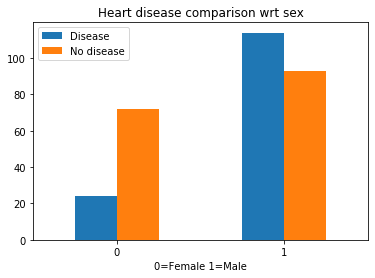

In [7]:
pd.crosstab(df["sex"],df["target"]).plot(kind="bar")
plt.title("Heart disease comparison wrt sex")
plt.xlabel("0=Female 1=Male")
plt.legend(["Disease","No disease"])
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

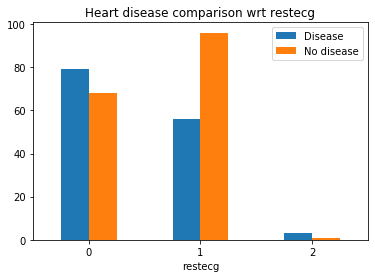

In [8]:
pd.crosstab(df["restecg"],df["target"]).plot(kind="bar")
plt.title("Heart disease comparison wrt restecg")
plt.legend(["Disease","No disease"])
plt.xticks(rotation=0)

(array([0, 1]), <a list of 2 Text xticklabel objects>)

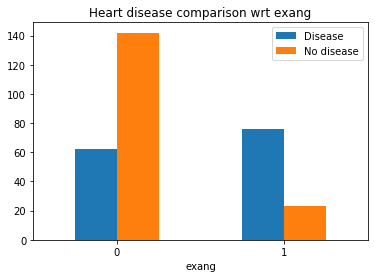

In [9]:
pd.crosstab(df["exang"],df["target"]).plot(kind="bar")
plt.title("Heart disease comparison wrt exang")
plt.legend(["Disease","No disease"])
plt.xticks(rotation=0)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

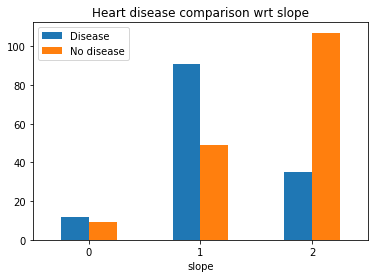

In [10]:
pd.crosstab(df["slope"],df["target"]).plot(kind="bar")
plt.title("Heart disease comparison wrt slope")
plt.legend(["Disease","No disease"])
plt.xticks(rotation=0)

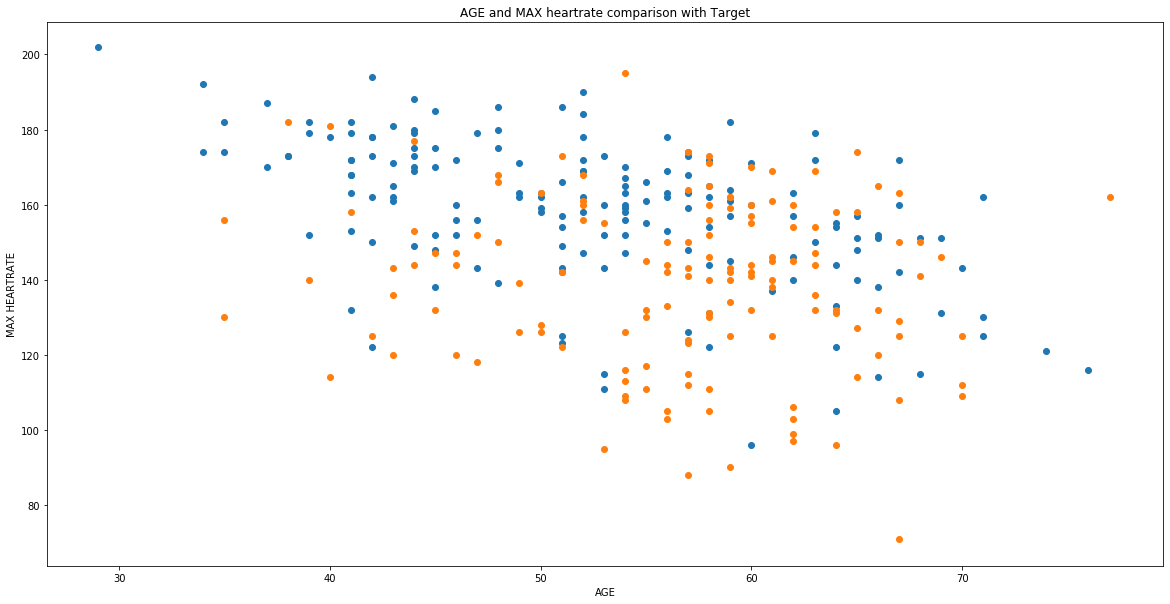

In [11]:
plt.figure(figsize=(20,10))
plt.scatter(df.age[df["target"]==1],df.thalach[df["target"]==1])
plt.scatter(df.age[df["target"]==0],df.thalach[df["target"]==0])
plt.title("AGE and MAX heartrate comparison with Target")
plt.xlabel("AGE")
plt.ylabel("MAX HEARTRATE");

In [12]:
#correlation
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


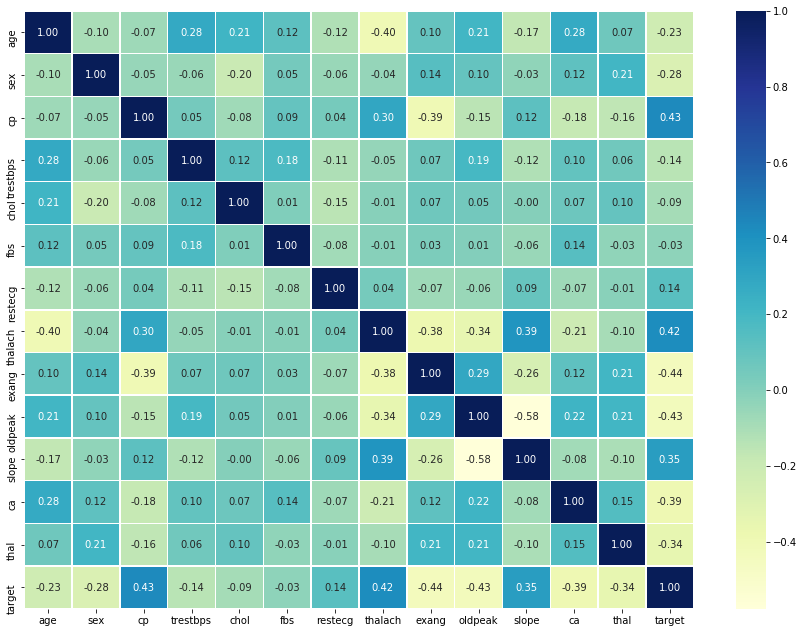

In [13]:
fig,ax= plt.subplots(figsize=(15,11))
ax = seaborn.heatmap(df.corr(),
                    annot=True,
                    linewidths=0.5,
                    fmt=".2f",
                    cmap="YlGnBu")

## MODELLING

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
X= df.drop(['target'],axis=1)
X


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [16]:
y=df.target
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### spilting data

In [17]:
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

### Three Models will be used :
1. Logistic Regression
2. K Nearest Neighbours
3. Random Forest Classifier

In [18]:
#Dictionary to hold all the models
models={"LR":LogisticRegression(),
        "KNN":KNeighborsClassifier(),
         "RFC":RandomForestClassifier()}

In [19]:
def fit_and_score(models,X_train,X_test,y_train,y_test):
    '''
    Funcion to fit differrent models to training data and score the models on test data
    models: Dictionary of models
    X_tarin:training inputs
    X_test:test inputs
    y_train:training labels
    y_test:test labels
    '''
    np.random.seed(42)
    model_score={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name]=model.score(X_test,y_test)
    return model_score    
        

In [20]:
c=fit_and_score(models=models,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test)
c

D:\MLproject1\env\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'LR': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'RFC': 0.8360655737704918}

In [21]:
model_score=pd.DataFrame(c,index=["Accuracy"])
model_score

,LR,KNN,RFC
Accuracy,0.885246,0.688525,0.836066


In [22]:
model_score.T

,Accuracy
LR,0.885246
KNN,0.688525
RFC,0.836066


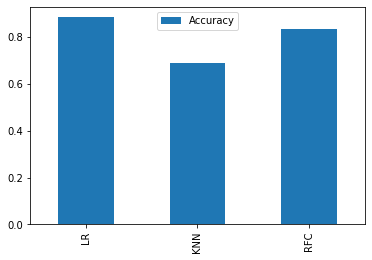

In [23]:

model_score.T.plot(kind="bar")

### KNN is OUT

## Hyperparameter Tunning(By hand for KNN)

In [24]:
train_scores=[]
test_scores=[]
neighbours=range(1,20)
knn=KNeighborsClassifier()
for i in neighbours:
    
    knn.set_params(n_neighbors=i)
    knn.fit(X_train,y_train)
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))
    

In [25]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818]

In [26]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853]

In [27]:
max(test_scores)

0.7540983606557377

*BAD* *Removes KNN forever

## Hyperparameter Tunning using RandomizedSearchCV
1. Logistic Regression
2. Random Forest Classifier

In [28]:
log_reg_grid={"C":np.logspace(-4,4,20),
              "solver":["liblinear"]
             }

rf_grid = {"n_estimators":np.arange(10,1000,50),
           "max_depth":[None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)
          }

In [29]:
np.random.seed(42)
rs_log_reg=RandomizedSearchCV(LogisticRegression(),
                              param_distributions=log_reg_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C':...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [30]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [31]:
rs_log_reg.score(X_test,y_test)

0.8852459016393442

In [32]:
np.random.seed(42)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                              param_distributions=rf_grid,
                             cv=5,
                             n_iter=20,
                             verbose=True)
rs_rf.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.7min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [33]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [34]:
rs_rf.score(X_test,y_test)

0.8688524590163934

## Hyperparameter tunning using Grid Search CV

In [35]:
log_reg_grid2={"C":np.logspace(-5,5,40),
              "solver":["liblinear"]
             }


In [36]:
np.random.seed(42)
gs_log_reg=GridSearchCV(LogisticRegression(),
                              param_grid=log_reg_grid2,
                             cv=5,
                             verbose=True)
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:    1.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-05, 1.8...
       1.42510267e+01, 2.57191381e+01, 4.64158883e+01, 8.37677640e+01,
       1.51177507e+02, 2.72833338e+02, 4.92388263e+02, 8.88623816e+02,
       1.60371874e+03, 2.89426612e+03, 5.22334507e+03, 9.42668455e+03,
       1.70125428e+04, 3.07029063e+04, 5.54102033e+04, 1.00000000e+05]),
      

In [37]:
gs_log_reg.best_params_

{'C': 0.22854638641349884, 'solver': 'liblinear'}

In [38]:
gs_log_reg.score(X_test,y_test)

0.8852459016393442

In [39]:
y_preds=gs_log_reg.predict(X_test)

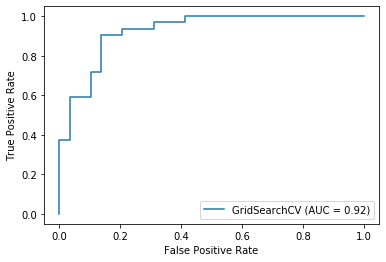

In [40]:
plot_roc_curve(gs_log_reg,X_test,y_test);


In [41]:
print(confusion_matrix(y_test,y_preds))

[[25  4]
 [ 3 29]]


In [42]:
def plot_confusion_matrix(y_test,y_preds):
    fig, ax=plt.subplots(figsize=(3,3))
    ax=seaborn.heatmap(confusion_matrix(y_test,y_preds),
                      annot=True,
                      cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")
    

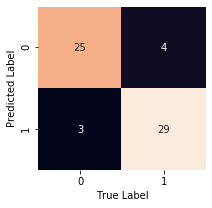

In [43]:
plot_confusion_matrix(y_test,y_preds)

In [44]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



In [45]:
gs_log_reg.best_params_

{'C': 0.22854638641349884, 'solver': 'liblinear'}

In [46]:
clf= LogisticRegression(C=0.22854638641349884, solver= 'liblinear')

In [47]:
cv_acc=cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring="accuracy")
cv_acc=np.mean(cv_acc)
cv_acc

0.8479781420765027

In [48]:
cv_pre=cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring="precision")
cv_pre=np.mean(cv_pre)
cv_pre

0.8215873015873015

In [49]:
cv_rec=cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring="recall")
cv_rec=np.mean(cv_rec)
cv_rec

0.9272727272727274

In [50]:
cv_f1=cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring="f1")
cv_f1=np.mean(cv_f1)
cv_f1

0.8705403543192143

In [51]:
cv_metrics= pd.DataFrame({"Accuracy":cv_acc,
                         "Precision":cv_pre,
                         "Recall":cv_rec,
                         "F1":cv_f1},
                        index=[0])
cv_metrics

,Accuracy,Precision,Recall,F1
0,0.847978,0.821587,0.927273,0.87054


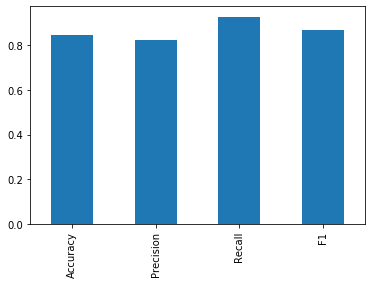

In [52]:
cv_metrics.T.plot(kind="bar",legend=False)


## Important Features

In [53]:
gs_log_reg.best_params_

{'C': 0.22854638641349884, 'solver': 'liblinear'}

In [54]:

clf2= LogisticRegression(C=0.22854638641349884, solver="liblinear")
clf2.fit(X_train,y_train)


LogisticRegression(C=0.22854638641349884, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
clf2.coef_

array([[ 0.00362182, -0.89930452,  0.67260852, -0.01159638, -0.00170179,
         0.04814852,  0.32955144,  0.0247238 , -0.62776511, -0.57440945,
         0.46781607, -0.64850103, -0.69419934]])

In [56]:
feature_dict=dict(zip(df.columns,list(clf2.coef_[0])))
feature_dict

{'age': 0.0036218241131829023,
 'sex': -0.8993045174530075,
 'cp': 0.6726085242282946,
 'trestbps': -0.011596375668930169,
 'chol': -0.0017017877689077558,
 'fbs': 0.04814852411545512,
 'restecg': 0.3295514432284064,
 'thalach': 0.024723801010018545,
 'exang': -0.6277651143391237,
 'oldpeak': -0.5744094460119887,
 'slope': 0.4678160740616876,
 'ca': -0.6485010278960655,
 'thal': -0.6941993428452}

In [57]:
feature_df=pd.DataFrame(feature_dict,index=[0])

In [58]:
feature_df.T

,0
age,0.003622
sex,-0.899305
cp,0.672609
trestbps,-0.011596
chol,-0.001702
fbs,0.048149
restecg,0.329551
thalach,0.024724
exang,-0.627765
oldpeak,-0.574409


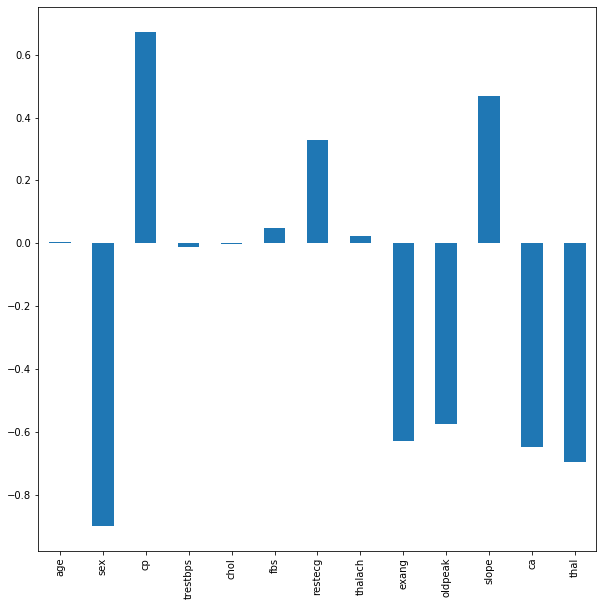

In [59]:
feature_df.T.plot(kind='bar',legend=False,figsize=(10,10));

# Some Experimenting

In [61]:
from catboost import CatBoostClassifier, Pool, cv


In [62]:
np.random.seed(42)
x_tr,x_val,y_tr,y_val=train_test_split(X_train,y_train,train_size=0.75)

In [63]:

model = CatBoostClassifier(
    custom_loss=['Accuracy'],
    random_seed=42,
    logging_level='Silent'
)

In [65]:
print(X.dtypes)

categorical_features_indices = np.where(X.dtypes != np.float)[0]

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
dtype: object


In [67]:
model.fit(
    x_tr, y_tr,
    cat_features=categorical_features_indices,
    eval_set=(x_val, y_val),
    logging_level='Verbose',  # you can uncomment this for text output
    plot=True
);


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.020776
0:	learn: 0.6775348	test: 0.6822816	best: 0.6822816 (0)	total: 45ms	remaining: 45s
1:	learn: 0.6612321	test: 0.6677441	best: 0.6677441 (1)	total: 81.5ms	remaining: 40.7s
2:	learn: 0.6485505	test: 0.6570459	best: 0.6570459 (2)	total: 120ms	remaining: 39.9s
3:	learn: 0.6341356	test: 0.6469762	best: 0.6469762 (3)	total: 157ms	remaining: 39.1s
4:	learn: 0.6215291	test: 0.6376234	best: 0.6376234 (4)	total: 181ms	remaining: 36.1s
5:	learn: 0.6082832	test: 0.6275825	best: 0.6275825 (5)	total: 212ms	remaining: 35.2s
6:	learn: 0.5944291	test: 0.6153923	best: 0.6153923 (6)	total: 256ms	remaining: 36.3s
7:	learn: 0.5821798	test: 0.6032508	best: 0.6032508 (7)	total: 270ms	remaining: 33.5s
8:	learn: 0.5702457	test: 0.5962160	best: 0.5962160 (8)	total: 294ms	remaining: 32.4s
9:	learn: 0.5589887	test: 0.5889814	best: 0.5889814 (9)	total: 330ms	remaining: 32.7s
10:	learn: 0.5457043	test: 0.5806478	best: 0.5806478 (10)	total: 359ms	remaining: 32.3s
11:	learn: 0.5338717	tes

97:	learn: 0.2377763	test: 0.4478554	best: 0.4460070 (95)	total: 3.34s	remaining: 30.7s
98:	learn: 0.2361247	test: 0.4479791	best: 0.4460070 (95)	total: 3.38s	remaining: 30.8s
99:	learn: 0.2346684	test: 0.4479711	best: 0.4460070 (95)	total: 3.42s	remaining: 30.8s
100:	learn: 0.2329800	test: 0.4477542	best: 0.4460070 (95)	total: 3.46s	remaining: 30.8s
101:	learn: 0.2322744	test: 0.4476640	best: 0.4460070 (95)	total: 3.5s	remaining: 30.8s
102:	learn: 0.2317708	test: 0.4480606	best: 0.4460070 (95)	total: 3.54s	remaining: 30.8s
103:	learn: 0.2302894	test: 0.4468833	best: 0.4460070 (95)	total: 3.57s	remaining: 30.8s
104:	learn: 0.2288940	test: 0.4460688	best: 0.4460070 (95)	total: 3.62s	remaining: 30.9s
105:	learn: 0.2267901	test: 0.4462635	best: 0.4460070 (95)	total: 3.66s	remaining: 30.9s
106:	learn: 0.2258641	test: 0.4460113	best: 0.4460070 (95)	total: 3.7s	remaining: 30.8s
107:	learn: 0.2245164	test: 0.4459909	best: 0.4459909 (107)	total: 3.73s	remaining: 30.8s
108:	learn: 0.2232585	tes

189:	learn: 0.1589422	test: 0.4558999	best: 0.4459909 (107)	total: 6.29s	remaining: 26.8s
190:	learn: 0.1584428	test: 0.4557996	best: 0.4459909 (107)	total: 6.33s	remaining: 26.8s
191:	learn: 0.1578800	test: 0.4559809	best: 0.4459909 (107)	total: 6.37s	remaining: 26.8s
192:	learn: 0.1572530	test: 0.4564366	best: 0.4459909 (107)	total: 6.4s	remaining: 26.8s
193:	learn: 0.1567297	test: 0.4568419	best: 0.4459909 (107)	total: 6.43s	remaining: 26.7s
194:	learn: 0.1560366	test: 0.4569393	best: 0.4459909 (107)	total: 6.47s	remaining: 26.7s
195:	learn: 0.1557316	test: 0.4571418	best: 0.4459909 (107)	total: 6.51s	remaining: 26.7s
196:	learn: 0.1550184	test: 0.4563243	best: 0.4459909 (107)	total: 6.55s	remaining: 26.7s
197:	learn: 0.1545214	test: 0.4562318	best: 0.4459909 (107)	total: 6.57s	remaining: 26.6s
198:	learn: 0.1536718	test: 0.4563597	best: 0.4459909 (107)	total: 6.59s	remaining: 26.5s
199:	learn: 0.1528017	test: 0.4567506	best: 0.4459909 (107)	total: 6.62s	remaining: 26.5s
200:	learn:

281:	learn: 0.1128066	test: 0.4716249	best: 0.4459909 (107)	total: 9.44s	remaining: 24s
282:	learn: 0.1126418	test: 0.4715301	best: 0.4459909 (107)	total: 9.49s	remaining: 24s
283:	learn: 0.1123129	test: 0.4709291	best: 0.4459909 (107)	total: 9.52s	remaining: 24s
284:	learn: 0.1121998	test: 0.4713041	best: 0.4459909 (107)	total: 9.55s	remaining: 24s
285:	learn: 0.1119529	test: 0.4724566	best: 0.4459909 (107)	total: 9.59s	remaining: 23.9s
286:	learn: 0.1114061	test: 0.4719874	best: 0.4459909 (107)	total: 9.62s	remaining: 23.9s
287:	learn: 0.1109144	test: 0.4713034	best: 0.4459909 (107)	total: 9.64s	remaining: 23.8s
288:	learn: 0.1102029	test: 0.4712812	best: 0.4459909 (107)	total: 9.68s	remaining: 23.8s
289:	learn: 0.1094326	test: 0.4705723	best: 0.4459909 (107)	total: 9.71s	remaining: 23.8s
290:	learn: 0.1092592	test: 0.4711013	best: 0.4459909 (107)	total: 9.76s	remaining: 23.8s
291:	learn: 0.1089323	test: 0.4712334	best: 0.4459909 (107)	total: 9.79s	remaining: 23.7s
292:	learn: 0.1087

375:	learn: 0.0870858	test: 0.4771906	best: 0.4459909 (107)	total: 13s	remaining: 21.6s
376:	learn: 0.0866778	test: 0.4778776	best: 0.4459909 (107)	total: 13.1s	remaining: 21.6s
377:	learn: 0.0866353	test: 0.4778418	best: 0.4459909 (107)	total: 13.1s	remaining: 21.6s
378:	learn: 0.0865217	test: 0.4776434	best: 0.4459909 (107)	total: 13.2s	remaining: 21.6s
379:	learn: 0.0861651	test: 0.4779220	best: 0.4459909 (107)	total: 13.2s	remaining: 21.5s
380:	learn: 0.0858764	test: 0.4774417	best: 0.4459909 (107)	total: 13.2s	remaining: 21.5s
381:	learn: 0.0856784	test: 0.4769029	best: 0.4459909 (107)	total: 13.3s	remaining: 21.5s
382:	learn: 0.0856516	test: 0.4769654	best: 0.4459909 (107)	total: 13.3s	remaining: 21.5s
383:	learn: 0.0852769	test: 0.4769060	best: 0.4459909 (107)	total: 13.4s	remaining: 21.4s
384:	learn: 0.0850070	test: 0.4769581	best: 0.4459909 (107)	total: 13.4s	remaining: 21.4s
385:	learn: 0.0848340	test: 0.4769397	best: 0.4459909 (107)	total: 13.4s	remaining: 21.4s
386:	learn: 

468:	learn: 0.0675435	test: 0.4881164	best: 0.4459909 (107)	total: 16.5s	remaining: 18.7s
469:	learn: 0.0671793	test: 0.4874208	best: 0.4459909 (107)	total: 16.5s	remaining: 18.7s
470:	learn: 0.0668215	test: 0.4882269	best: 0.4459909 (107)	total: 16.6s	remaining: 18.6s
471:	learn: 0.0667380	test: 0.4882412	best: 0.4459909 (107)	total: 16.6s	remaining: 18.6s
472:	learn: 0.0665318	test: 0.4888637	best: 0.4459909 (107)	total: 16.6s	remaining: 18.5s
473:	learn: 0.0661930	test: 0.4892631	best: 0.4459909 (107)	total: 16.6s	remaining: 18.5s
474:	learn: 0.0660295	test: 0.4895391	best: 0.4459909 (107)	total: 16.7s	remaining: 18.4s
475:	learn: 0.0659396	test: 0.4891960	best: 0.4459909 (107)	total: 16.7s	remaining: 18.4s
476:	learn: 0.0658375	test: 0.4892814	best: 0.4459909 (107)	total: 16.8s	remaining: 18.4s
477:	learn: 0.0656180	test: 0.4902953	best: 0.4459909 (107)	total: 16.8s	remaining: 18.4s
478:	learn: 0.0654969	test: 0.4901057	best: 0.4459909 (107)	total: 16.8s	remaining: 18.3s
479:	learn

560:	learn: 0.0536284	test: 0.5013780	best: 0.4459909 (107)	total: 19.8s	remaining: 15.5s
561:	learn: 0.0535683	test: 0.5014997	best: 0.4459909 (107)	total: 19.8s	remaining: 15.5s
562:	learn: 0.0535020	test: 0.5024122	best: 0.4459909 (107)	total: 19.9s	remaining: 15.4s
563:	learn: 0.0534843	test: 0.5023890	best: 0.4459909 (107)	total: 19.9s	remaining: 15.4s
564:	learn: 0.0534660	test: 0.5025887	best: 0.4459909 (107)	total: 20s	remaining: 15.4s
565:	learn: 0.0534293	test: 0.5025254	best: 0.4459909 (107)	total: 20s	remaining: 15.3s
566:	learn: 0.0531286	test: 0.5022017	best: 0.4459909 (107)	total: 20s	remaining: 15.3s
567:	learn: 0.0530348	test: 0.5022391	best: 0.4459909 (107)	total: 20.1s	remaining: 15.3s
568:	learn: 0.0528076	test: 0.5024184	best: 0.4459909 (107)	total: 20.1s	remaining: 15.2s
569:	learn: 0.0526672	test: 0.5024402	best: 0.4459909 (107)	total: 20.1s	remaining: 15.2s
570:	learn: 0.0526549	test: 0.5024265	best: 0.4459909 (107)	total: 20.2s	remaining: 15.2s
571:	learn: 0.05

654:	learn: 0.0430784	test: 0.5207251	best: 0.4459909 (107)	total: 23.4s	remaining: 12.3s
655:	learn: 0.0429630	test: 0.5205129	best: 0.4459909 (107)	total: 23.5s	remaining: 12.3s
656:	learn: 0.0428656	test: 0.5211988	best: 0.4459909 (107)	total: 23.5s	remaining: 12.3s
657:	learn: 0.0427124	test: 0.5206667	best: 0.4459909 (107)	total: 23.5s	remaining: 12.2s
658:	learn: 0.0426257	test: 0.5209769	best: 0.4459909 (107)	total: 23.6s	remaining: 12.2s
659:	learn: 0.0425515	test: 0.5206137	best: 0.4459909 (107)	total: 23.6s	remaining: 12.2s
660:	learn: 0.0425336	test: 0.5205812	best: 0.4459909 (107)	total: 23.6s	remaining: 12.1s
661:	learn: 0.0424294	test: 0.5207761	best: 0.4459909 (107)	total: 23.7s	remaining: 12.1s
662:	learn: 0.0422948	test: 0.5207460	best: 0.4459909 (107)	total: 23.8s	remaining: 12.1s
663:	learn: 0.0422894	test: 0.5207593	best: 0.4459909 (107)	total: 23.8s	remaining: 12s
664:	learn: 0.0422362	test: 0.5211283	best: 0.4459909 (107)	total: 23.8s	remaining: 12s
665:	learn: 0.

749:	learn: 0.0357927	test: 0.5347667	best: 0.4459909 (107)	total: 27.5s	remaining: 9.18s
750:	learn: 0.0357473	test: 0.5353058	best: 0.4459909 (107)	total: 27.6s	remaining: 9.14s
751:	learn: 0.0356949	test: 0.5352301	best: 0.4459909 (107)	total: 27.6s	remaining: 9.1s
752:	learn: 0.0356172	test: 0.5353921	best: 0.4459909 (107)	total: 27.6s	remaining: 9.07s
753:	learn: 0.0355640	test: 0.5355380	best: 0.4459909 (107)	total: 27.7s	remaining: 9.04s
754:	learn: 0.0354452	test: 0.5370090	best: 0.4459909 (107)	total: 27.7s	remaining: 9s
755:	learn: 0.0353029	test: 0.5369465	best: 0.4459909 (107)	total: 27.8s	remaining: 8.97s
756:	learn: 0.0352010	test: 0.5370191	best: 0.4459909 (107)	total: 27.8s	remaining: 8.94s
757:	learn: 0.0350912	test: 0.5367968	best: 0.4459909 (107)	total: 27.9s	remaining: 8.9s
758:	learn: 0.0349231	test: 0.5365124	best: 0.4459909 (107)	total: 27.9s	remaining: 8.87s
759:	learn: 0.0348480	test: 0.5365909	best: 0.4459909 (107)	total: 28.1s	remaining: 8.86s
760:	learn: 0.0

846:	learn: 0.0293021	test: 0.5509831	best: 0.4459909 (107)	total: 31.7s	remaining: 5.73s
847:	learn: 0.0292632	test: 0.5510876	best: 0.4459909 (107)	total: 31.8s	remaining: 5.7s
848:	learn: 0.0292179	test: 0.5511105	best: 0.4459909 (107)	total: 31.8s	remaining: 5.66s
849:	learn: 0.0291439	test: 0.5516172	best: 0.4459909 (107)	total: 31.9s	remaining: 5.62s
850:	learn: 0.0290672	test: 0.5517963	best: 0.4459909 (107)	total: 31.9s	remaining: 5.58s
851:	learn: 0.0290123	test: 0.5522717	best: 0.4459909 (107)	total: 31.9s	remaining: 5.54s
852:	learn: 0.0290015	test: 0.5524855	best: 0.4459909 (107)	total: 32s	remaining: 5.51s
853:	learn: 0.0289504	test: 0.5525067	best: 0.4459909 (107)	total: 32s	remaining: 5.47s
854:	learn: 0.0289086	test: 0.5525404	best: 0.4459909 (107)	total: 32s	remaining: 5.43s
855:	learn: 0.0288606	test: 0.5527403	best: 0.4459909 (107)	total: 32.1s	remaining: 5.4s
856:	learn: 0.0288386	test: 0.5531822	best: 0.4459909 (107)	total: 32.1s	remaining: 5.36s
857:	learn: 0.0287

941:	learn: 0.0250206	test: 0.5646777	best: 0.4459909 (107)	total: 35.7s	remaining: 2.2s
942:	learn: 0.0250078	test: 0.5645257	best: 0.4459909 (107)	total: 35.8s	remaining: 2.16s
943:	learn: 0.0249752	test: 0.5646527	best: 0.4459909 (107)	total: 35.8s	remaining: 2.12s
944:	learn: 0.0249132	test: 0.5653115	best: 0.4459909 (107)	total: 35.9s	remaining: 2.09s
945:	learn: 0.0248659	test: 0.5651218	best: 0.4459909 (107)	total: 35.9s	remaining: 2.05s
946:	learn: 0.0248628	test: 0.5650425	best: 0.4459909 (107)	total: 35.9s	remaining: 2.01s
947:	learn: 0.0248369	test: 0.5645899	best: 0.4459909 (107)	total: 36s	remaining: 1.97s
948:	learn: 0.0247853	test: 0.5646412	best: 0.4459909 (107)	total: 36s	remaining: 1.94s
949:	learn: 0.0247746	test: 0.5646588	best: 0.4459909 (107)	total: 36.1s	remaining: 1.9s
950:	learn: 0.0247193	test: 0.5646102	best: 0.4459909 (107)	total: 36.1s	remaining: 1.86s
951:	learn: 0.0246582	test: 0.5646029	best: 0.4459909 (107)	total: 36.1s	remaining: 1.82s
952:	learn: 0.02

In [70]:
model.score(X_test,y_test)

0.8852459016393442

In [71]:
cv_params = model.get_params()
cv_params.update({
    'loss_function': 'Logloss'
})
cv_data = cv(
    Pool(X_train, y_train, cat_features=categorical_features_indices),
    cv_params,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [72]:

print('Best validation accuracy score: {:.2f}±{:.2f} on step {}'.format(
    np.max(cv_data['test-Accuracy-mean']),
    cv_data['test-Accuracy-std'][np.argmax(cv_data['test-Accuracy-mean'])],
    np.argmax(cv_data['test-Accuracy-mean'])
))

Best validation accuracy score: 0.83±0.05 on step 3


In [73]:
print('Precise validation accuracy score: {}'.format(np.max(cv_data['test-Accuracy-mean'])))

Precise validation accuracy score: 0.8263211382113821


In [74]:
predictions = model.predict(X_test)
predictions_probs = model.predict_proba(X_test)
print(predictions[:10])
print(predictions_probs[:10])

[0 1 1 0 1 1 0 0 0 1]
[[0.94171003 0.05828997]
 [0.27261678 0.72738322]
 [0.24719149 0.75280851]
 [0.95732043 0.04267957]
 [0.11777666 0.88222334]
 [0.06146284 0.93853716]
 [0.52512026 0.47487974]
 [0.94873198 0.05126802]
 [0.95410582 0.04589418]
 [0.41211448 0.58788552]]


In [75]:
model.score(X_test,y_test)

0.8852459016393442

In [76]:

model_without_seed = CatBoostClassifier(iterations=10, logging_level='Silent')
model_without_seed.fit(X_train, y_train, cat_features=categorical_features_indices)

print('Random seed assigned for this model: {}'.format(model_without_seed.random_seed_))

Random seed assigned for this model: 0


In [82]:
len(y_tr)

181

In [83]:
params = {
    'iterations': 500,
    'learning_rate': 0.1,
    'eval_metric': 'Accuracy',
    'random_seed': 42,
    'logging_level': 'Silent',
    'use_best_model': False
}
train_pool = Pool(x_tr, y_tr, cat_features=categorical_features_indices)
validate_pool = Pool(x_val, y_val, cat_features=categorical_features_indices)

In [86]:
from sklearn.metrics import accuracy_score
model = CatBoostClassifier(**params)
model.fit(train_pool, eval_set=validate_pool)

best_model_params = params.copy()
best_model_params.update({
    'use_best_model': True
})
best_model = CatBoostClassifier(**best_model_params)
best_model.fit(train_pool, eval_set=validate_pool);

print('Simple model validation accuracy: {:.4}'.format(
    accuracy_score(y_val, model.predict(x_val))
))
print('')

print('Best model validation accuracy: {:.4}'.format(
    accuracy_score(y_val, best_model.predict(x_val))
))


Simple model validation accuracy: 0.7869

Best model validation accuracy: 0.8197


In [87]:
from sklearn.neural_network import MLPClassifier

In [88]:
clf3=MLPClassifier()

In [93]:
clf3.fit(X_train,y_train)

D:\MLproject1\env\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [94]:
clf3.score(X_test,y_test)

0.8688524590163934

In [104]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


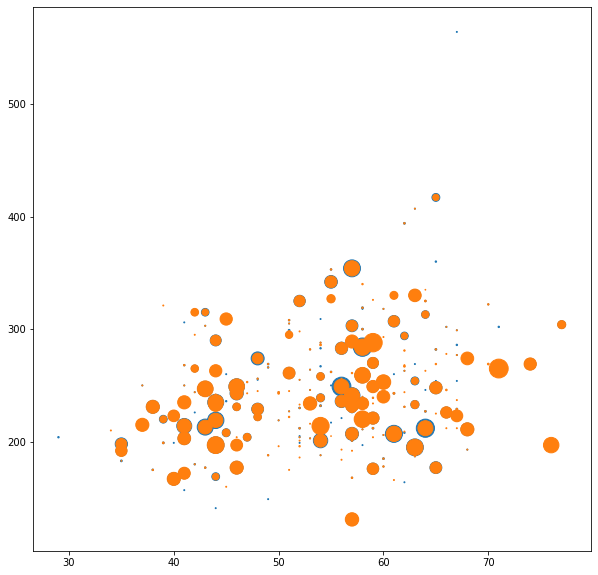

In [106]:
fig,ax=plt.subplots(figsize=(10,10))
ax=plt.scatter(df.age,df.chol,df[df.target==0])
ax=plt.scatter(df.age,df.chol,df[df.target==1])